Занятие 6. Линейная регрессия
===========

Прогнозирование   fancy
===============

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_05_regression_forecast/06_seasonal_models")


In [4]:
df = pd.read_csv('fancy.csv', decimal=',', sep=";")
df.head(8)

,sales
0,1664.81
1,2397.53
2,2840.71
3,3547.29
4,3752.96
5,3714.74
6,4349.61
7,3566.34


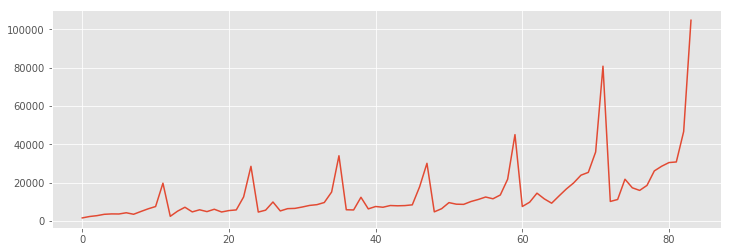

In [5]:
fig = plt.figure(figsize=(12, 4))
df['sales'].plot()


In [6]:
df['log_y'] = np.log10(df['sales'])

In [7]:
df.head()

,sales,log_y
0,1664.81,3.221365
1,2397.53,3.379764
2,2840.71,3.453427
3,3547.29,3.549897
4,3752.96,3.574374


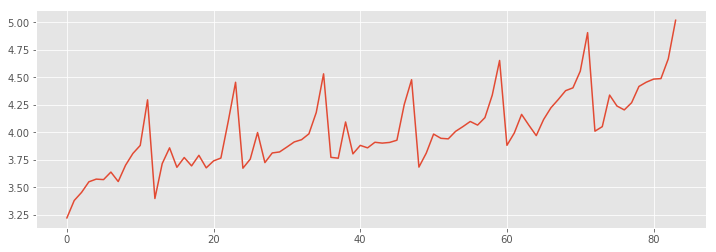

In [8]:
fig = plt.figure(figsize=(12, 4))
df['log_y'].plot()

In [9]:
#  df2 = df.drop([0,1,2,3], axis=0)
#  df2.head()

In [10]:
df3 = df[3:]
df3.head()

,sales,log_y
3,3547.29,3.549897
4,3752.96,3.574374
5,3714.74,3.569928
6,4349.61,3.638450
7,3566.34,3.552223


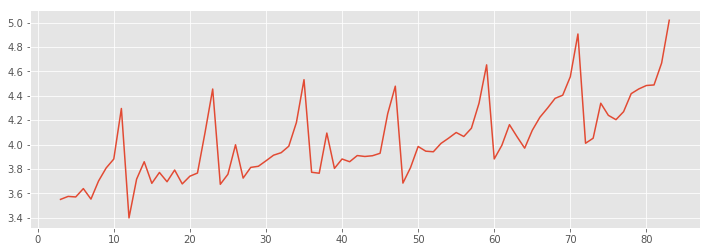

In [11]:
fig = plt.figure(figsize=(12, 4))
df3['log_y'].plot()


In [12]:
len(df3)

81

In [13]:
df3['month_num'] = range(1, len(df3) + 1)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df3

,sales,log_y,month_num
3,3547.29,3.549897,1
4,3752.96,3.574374,2
5,3714.74,3.569928,3
6,4349.61,3.638450,4
7,3566.34,3.552223,5
8,5021.82,3.700861,6
9,6423.48,3.807770,7
10,7600.60,3.880848,8
11,19756.21,4.295704,9
12,2499.81,3.397907,10


In [15]:
df_4 = df3.drop(columns=["sales"])

In [16]:
81/12

6.75

In [17]:
df_4["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*7)[0: len(df_4) ]
df_4["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*7)[0: len(df_4) ]
df_4["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*7)[0: len(df_4) ]
df_4["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*7)[0: len(df_4) ]
df_4["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*7)[0: len(df_4) ]
df_4["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*7)[0: len(df_4) ]


In [18]:
df_4.head(15)

,log_y,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
3,3.549897,1,1,0,0,0,0,0,0,0,0,0,0,0
4,3.574374,2,0,1,0,0,0,0,0,0,0,0,0,0
5,3.569928,3,0,0,1,0,0,0,0,0,0,0,0,0
6,3.638450,4,0,0,0,1,0,0,0,0,0,0,0,0
7,3.552223,5,0,0,0,0,1,0,0,0,0,0,0,0
8,3.700861,6,0,0,0,0,0,1,0,0,0,0,0,0
9,3.807770,7,0,0,0,0,0,0,1,0,0,0,0,0
10,3.880848,8,0,0,0,0,0,0,0,1,0,0,0,0
11,4.295704,9,0,0,0,0,0,0,0,0,1,0,0,0
12,3.397907,10,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
X = df_4.drop(columns=["log_y", "m07"])

#   X = df_4.drop(columns=["log_y"])



In [26]:
y = df_4['log_y']

In [27]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [29]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,3.668845,0.000000e+00
1,month_num,0.009415,0.000000e+00
2,m01,-0.158687,2.289995e-04
3,m02,-0.147493,5.707155e-04
4,m03,-0.130259,2.156350e-03
5,m04,-0.059917,1.485185e-01
6,m05,-0.069536,9.427050e-02
7,m06,-0.034051,4.093858e-01
8,m08,0.199644,5.693551e-06
9,m09,0.527899,0.000000e+00


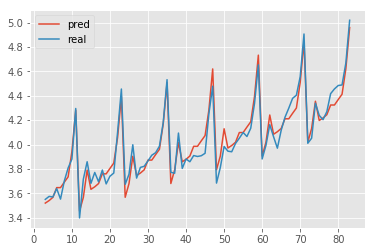

In [30]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [31]:
df_5= pd.DataFrame()

df_5['month_num'] = range(82, 82+12)


In [32]:
df_5

,month_num
0,82
1,83
2,84
3,85
4,86
5,87
6,88
7,89
8,90
9,91


In [33]:
df_5["m01"] = [0,0,0,1,0,0,0,0,0,0,0,0]
df_5["m02"] = [0,0,0,0,1,0,0,0,0,0,0,0]
df_5["m03"] = [0,0,0,0,0,1,0,0,0,0,0,0]
df_5["m04"] = [0,0,0,0,0,0,1,0,0,0,0,0]
df_5["m05"] = [0,0,0,0,0,0,0,1,0,0,0,0]
df_5["m06"] = [0,0,0,0,0,0,0,0,1,0,0,0]
#df_5["m07"] = [0,0,0,0,0,0,0,0,0,1,0,0]
df_5["m08"] = [0,0,0,0,0,0,0,0,0,0,1,0]
df_5["m09"] = [0,0,0,0,0,0,0,0,0,0,0,1]
df_5["m10"] = [1,0,0,0,0,0,0,0,0,0,0,0]
df_5["m11"] = [0,1,0,0,0,0,0,0,0,0,0,0]
df_5["m12"] = [0,0,1,0,0,0,0,0,0,0,0,0]

In [34]:
df_5

,month_num,m01,m02,m03,m04,m05,m06,m08,m09,m10,m11,m12
0,82,0,0,0,0,0,0,0,0,1,0,0
1,83,0,0,0,0,0,0,0,0,0,1,0
2,84,0,0,0,0,0,0,0,0,0,0,1
3,85,1,0,0,0,0,0,0,0,0,0,0
4,86,0,1,0,0,0,0,0,0,0,0,0
5,87,0,0,1,0,0,0,0,0,0,0,0
6,88,0,0,0,1,0,0,0,0,0,0,0
7,89,0,0,0,0,1,0,0,0,0,0,0
8,90,0,0,0,0,0,1,0,0,0,0,0
9,91,0,0,0,0,0,0,0,0,0,0,0


In [35]:
model.predict(df_5)


array([4.13203163, 4.24417577, 4.46829171, 4.31039217, 4.33100087,
       4.35764967, 4.43740615, 4.43720191, 4.48210156, 4.52556658,
       4.73462543, 5.0722951 ])

In [36]:
10**model.predict(df_5)

array([ 13552.88107955,  17545.90470443,  29396.23518795,  20435.82454298,
        21428.94889511,  22785.03361258,  27378.27926005,  27365.40720224,
        30346.00723549,  33540.27229333,  54278.19931868, 118112.29377687])

In [37]:
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
3,3.519573,3.549897,NaN
4,3.540181,3.574374,NaN
5,3.566830,3.569928,NaN
6,3.646587,3.638450,NaN
7,3.646382,3.552223,NaN


In [38]:
df_6 = pd.DataFrame(model.predict(df_5), columns=['forecast'])
df_6['real'] = np.nan
df_6['pred'] = np.nan
df_6.head()

,forecast,real,pred
0,4.132032,NaN,NaN
1,4.244176,NaN,NaN
2,4.468292,NaN,NaN
3,4.310392,NaN,NaN
4,4.331001,NaN,NaN


In [39]:
pred_1 = pd.concat(
    [pred, df_6],
    sort=False
).reset_index(drop=True)


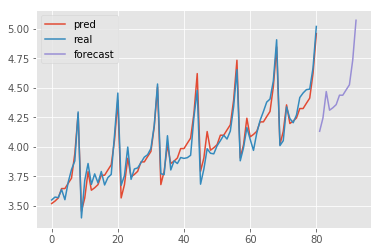

In [40]:
pred_1.plot()